In [0]:


import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

#https://data.world/crowdflower/drug-relation-database
from google.colab import files
uploaded = files.upload()

Saving drug-relation-dfe.csv to drug-relation-dfe.csv


In [0]:
import io
train=pd.read_csv(io.BytesIO(uploaded['drug-relation-dfe.csv']))

In [6]:
train.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,human_relation,human_relation:confidence,human_relation_type,human_relation_type:confidence,documentid,gold,human_relation_gold,human_relation_gold_reason,human_relation_type_gold,human_relation_type_gold_reason,text
0,711477194,True,golden,94,NaN,Personal experience,1.0000,Is prescibed for,0.8074,t1,True,1.0,Author tells about his/her personal experience.,2.0,"Person tells that he/she takes drug, BUT there...",I am also taking cough medicine and some <font...
1,711477195,True,golden,99,NaN,Impersonal experience,0.9609,Caused side effect,1.0000,t1,True,3.0,NaN,1.0,acetaminophen can cause sweating,"Medicines taken to lower fever, such as aspiri..."
2,711477196,True,golden,92,NaN,Personal experience,1.0000,Is prescibed for,0.6926,t3,True,1.0,Author tells about his/her personal experience.,2.0,"Person tells that he/she takes drug, BUT there...","<font color=""blue"">Acetaminophen</font> has a ..."
3,711477197,True,golden,90,NaN,Personal experience,1.0000,Was effective against,0.9651,t4,True,1.0,The author explicitly relates to an event s/he...,3.0,The autor explicitly states the drug was effec...,"I went back to the <font color=""blue"">Nexium</..."
4,711477198,True,golden,89,NaN,Personal experience,1.0000,Is prescibed for,0.5001,t5,True,1.0,The author relates to an event s/he personally...,2.0,There is an overt statement of drug administra...,"I used to get alot of <font color=""red"">headac..."


In [7]:

print('Train Shape: ',train.shape)
print('Train Unique Features: ',train.nunique())

Train Shape:  (2020, 16)
Train Unique Features:  _unit_id                           2020
_golden                               2
_unit_state                           2
_trusted_judgments                   14
_last_judgment_at                   271
human_relation                        5
human_relation:confidence           194
human_relation_type                   5
human_relation_type:confidence      236
documentid                         2019
gold                                  2
human_relation_gold                   5
human_relation_gold_reason           12
human_relation_type_gold              4
human_relation_type_gold_reason      18
text                               2020
dtype: int64


In [8]:
train.isnull().sum()

_unit_id                              0
_golden                               0
_unit_state                           0
_trusted_judgments                    0
_last_judgment_at                    20
human_relation                        0
human_relation:confidence             0
human_relation_type                   0
human_relation_type:confidence        0
documentid                            0
gold                                  0
human_relation_gold                2000
human_relation_gold_reason         2001
human_relation_type_gold           2000
human_relation_type_gold_reason    2000
text                                  0
dtype: int64

In [13]:
print('human_relation_gold_reason : ',train['human_relation'].value_counts())

human_relation_gold_reason :  Personal experience              1216
Impersonal experience             589
Question                          109
Personal experience negated        74
Impersonal experience negated      32
Name: human_relation, dtype: int64


In [16]:

print('human_relation_gold_reason : ',train['human_relation:confidence'].value_counts())

human_relation_gold_reason :  1.0000    1284
0.6667      47
0.6875      33
0.6739      32
0.6939      30
0.6596      28
0.7000      25
0.6471      25
0.6809      24
0.6800      22
0.7059      18
0.6327      16
0.6600      15
0.6735      14
0.6400      12
0.6538      12
0.6531      10
0.6200      10
0.3529       9
0.6522       9
0.6923       8
0.6863       8
0.6604       8
0.6688       7
0.6792       6
0.6712       6
0.6250       6
0.6778       5
0.3673       5
0.3600       5
          ... 
0.3436       1
0.6979       1
0.6532       1
0.3553       1
0.9608       1
0.6642       1
0.6625       1
0.6500       1
0.3462       1
0.6947       1
0.6786       1
0.7097       1
0.6569       1
0.6662       1
0.7021       1
0.6934       1
0.6637       1
0.6686       1
0.6439       1
0.6881       1
0.6346       1
0.6872       1
0.6434       1
0.3654       1
0.9273       1
0.6711       1
0.6830       1
0.6900       1
0.3501       1
0.6974       1
Name: human_relation:confidence, Length: 194, dtype: in

The author explicitly relates to an event s/he experienced personally.                                                      4
The author explicitly relates to an event s/he personally experienced.                                                      2
Author tells about his/her personal experience.                                                                             2
The author relates to an event s/he personally experienced.                                                                 2
There is no explicit statement that the author experienced the event personally.                                            2
The author asks about the possibility of two concepts being related.                                                        1
The author relates to an event s/he experienced personally.                                                                 1
There is no explicit statement that the event was personally experienced by the author.                               

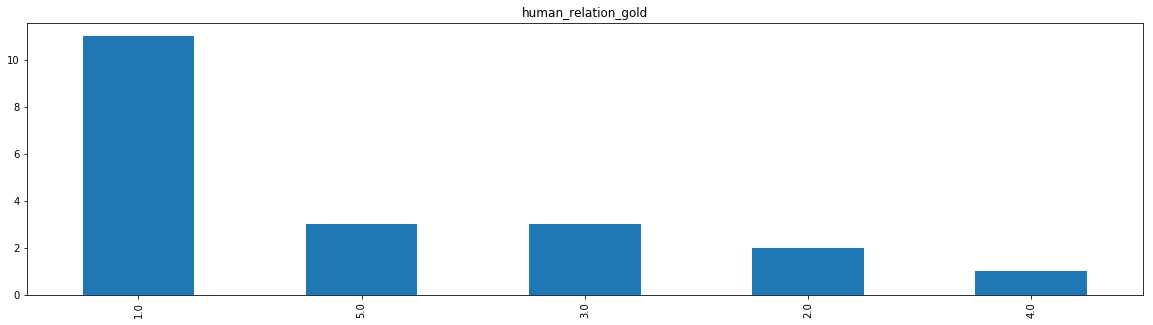

In [20]:
print(train['human_relation_gold_reason'].value_counts())
train['human_relation_gold'].value_counts().plot.bar(figsize=(20,5),title='human_relation_gold')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


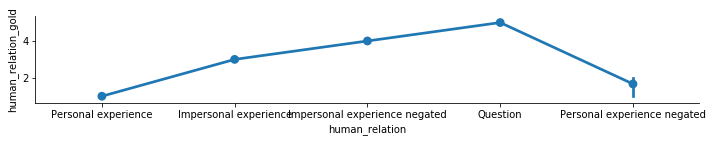

In [35]:
sns.factorplot('human_relation', 'human_relation_gold', data=train,kind='point',aspect=5, height = 2)

In [38]:

print('Number of sentences in training set:',len(train['human_relation_gold_reason'].unique()))
print('Average words per text in train:',train.groupby('human_relation_gold_reason')['human_relation_gold_reason'].count().mean())

Number of sentences in training set: 13
Average words per text in train: 1.5833333333333333


In [0]:
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

In [0]:
def display_wordCloud(train, title = None):
    wordcloud = WordCloud(background_color = 'black',
                         stopwords = stopwords,
                         max_words = 200,
                         max_font_size = 40,
                         scale = 3,
                         random_state = 1).generate(str(train))
    fig = plt.figure(1,figsize = (20,20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

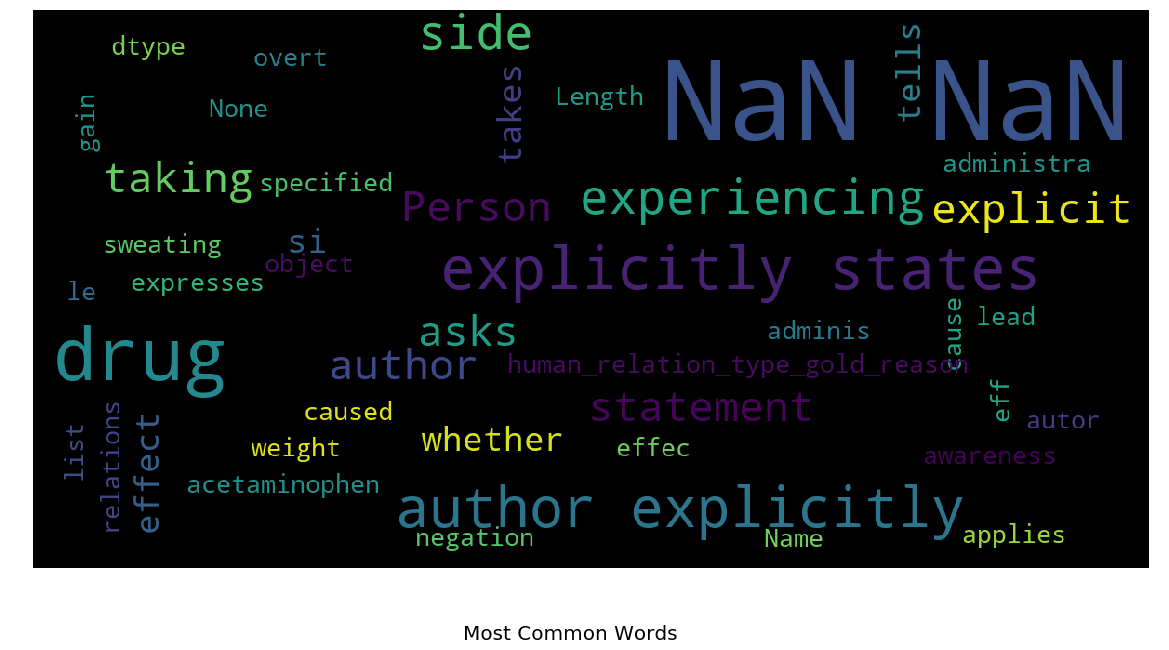

In [58]:
display_wordCloud(train['human_relation_type_gold_reason'],'Most Common Words ')

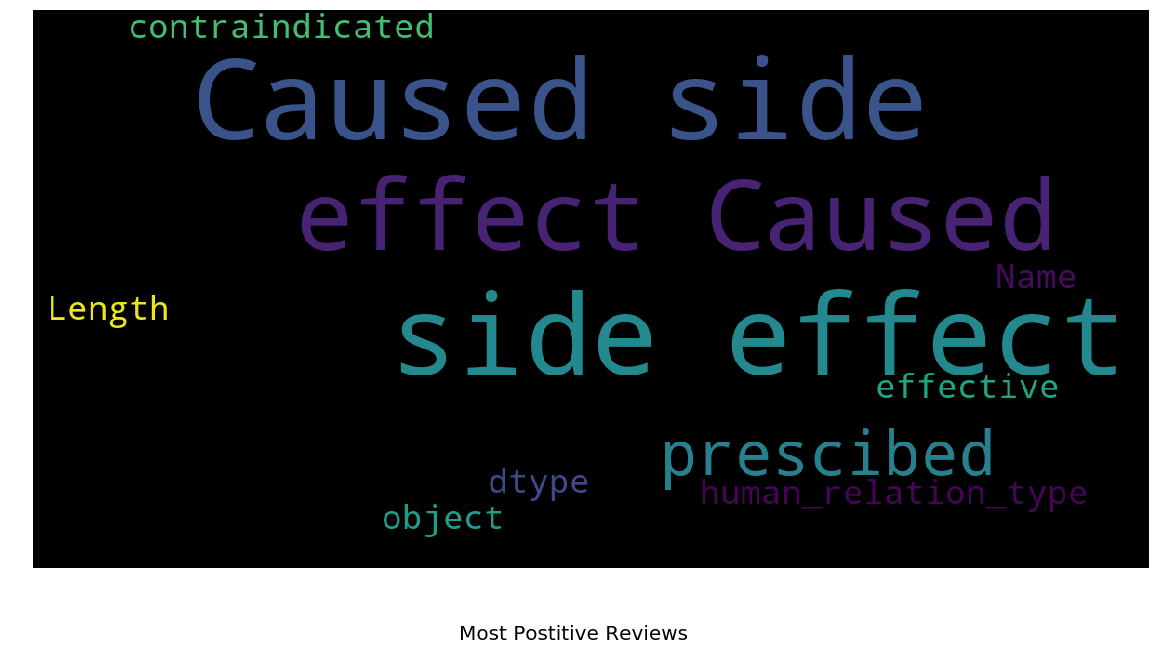

In [83]:
display_wordCloud(train[train['human_relation']=='Question']['human_relation_type'],'Most Postitive Reviews')

In [112]:
train[train['human_relation_type']=='Is prescibed for']

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,human_relation,human_relation:confidence,human_relation_type,human_relation_type:confidence,documentid,gold,human_relation_gold,human_relation_gold_reason,human_relation_type_gold,human_relation_type_gold_reason,text
0,711477194,True,golden,94,NaN,Personal experience,1.0000,Is prescibed for,0.8074,t1,True,1.0,Author tells about his/her personal experience.,2.0,"Person tells that he/she takes drug, BUT there...",I am also taking cough medicine and some <font...
2,711477196,True,golden,92,NaN,Personal experience,1.0000,Is prescibed for,0.6926,t3,True,1.0,Author tells about his/her personal experience.,2.0,"Person tells that he/she takes drug, BUT there...","<font color=""blue"">Acetaminophen</font> has a ..."
4,711477198,True,golden,89,NaN,Personal experience,1.0000,Is prescibed for,0.5001,t5,True,1.0,The author relates to an event s/he personally...,2.0,There is an overt statement of drug administra...,"I used to get alot of <font color=""red"">headac..."
16,711477210,True,golden,98,NaN,Personal experience,1.0000,Is prescibed for,0.8398,t17,True,1.0,The author explicitly relates to an event s/he...,2.0,There is an explicit statement of drug adminis...,"I took <font color=""blue"">atenolol</font> as a..."
57,711483519,False,finalized,3,4/29/15 18:06,Personal experience,0.6667,Is prescibed for,0.6667,38,False,NaN,NaN,NaN,NaN,"I have treated with <font color=""blue"">permeth..."
59,711483521,False,finalized,3,4/30/15 1:58,Personal experience,0.6200,Is prescibed for,0.6200,40,False,NaN,NaN,NaN,NaN,"will prescribe compazine or <font color=""blue""..."
71,711483533,False,finalized,3,4/29/15 17:47,Personal experience,0.6739,Is prescibed for,0.6739,52,False,NaN,NaN,NaN,NaN,She has not gotten her period since the initia...
82,711483544,False,finalized,3,4/29/15 18:59,Personal experience,1.0000,Is prescibed for,0.6667,63,False,NaN,NaN,NaN,NaN,"Dmarie129\t\t\t\t\treplied October 15th, 2012\..."
85,711483547,False,finalized,3,4/29/15 17:28,Impersonal experience,0.6766,Is prescibed for,0.6766,66,False,NaN,NaN,NaN,NaN,A drug prepared from natural or synthetic <fon...
89,711483551,False,finalized,3,4/30/15 8:51,Question,1.0000,Is prescibed for,1.0000,70,False,NaN,NaN,NaN,NaN,Is there a drug or supplement like Megace (<fo...


In [114]:
train[train['human_relation']=='Question']

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,human_relation,human_relation:confidence,human_relation_type,human_relation_type:confidence,documentid,gold,human_relation_gold,human_relation_gold_reason,human_relation_type_gold,human_relation_type_gold_reason,text
6,711477200,True,golden,88,NaN,Question,0.8023,Caused side effect,1.0000,t7,True,5.0,The author makes an inquiry.,1.0,The author asks whether the specified drug can...,"Someone mentioned that <font color=""blue"">accu..."
14,711477208,True,golden,87,NaN,Question,0.9602,Caused side effect,1.0000,t15,True,5.0,Person asks about possible relation between dr...,1.0,Person asks if taking drug could lead to side ...,"Did you have any <font color=""red"">weight gain..."
17,711477211,True,golden,94,NaN,Question,1.0000,Caused side effect,0.9587,t18,True,5.0,The author asks about the possibility of two c...,1.0,The author asks whether taking a drug could le...,"Has anyone had a <font color=""red"">rash</font>..."
31,711483493,False,finalized,3,4/29/15 17:55,Question,0.6809,Caused side effect,0.6809,12,False,NaN,NaN,NaN,NaN,Can any of the following cause persistent itch...
53,711483515,False,finalized,3,4/30/15 2:04,Question,1.0000,Caused side effect,1.0000,34,False,NaN,NaN,NaN,NaN,could it be possible that all the <font color=...
61,711483523,False,finalized,3,4/29/15 22:17,Question,0.6884,Caused side effect,1.0000,42,False,NaN,NaN,NaN,NaN,"I do have a little <font color=""red"">headache<..."
89,711483551,False,finalized,3,4/30/15 8:51,Question,1.0000,Is prescibed for,1.0000,70,False,NaN,NaN,NaN,NaN,Is there a drug or supplement like Megace (<fo...
96,711483558,False,finalized,3,4/29/15 18:09,Question,1.0000,Caused side effect,1.0000,77,False,NaN,NaN,NaN,NaN,"Has anyone had the <font color=""blue"">Levemir<..."
111,711483573,False,finalized,3,4/30/15 8:34,Question,0.6735,Is prescibed for,0.6735,92,False,NaN,NaN,NaN,NaN,"How long does it take for"" <font color=""red"">M..."
133,711483595,False,finalized,3,4/30/15 2:14,Question,1.0000,Caused side effect,1.0000,114,False,NaN,NaN,NaN,NaN,"> >> > so my question is, how much does the <f..."


In [138]:
train[train['human_relation_type']=='Caused side effect'][train['human_relation']=='Question']         

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,human_relation,human_relation:confidence,human_relation_type,human_relation_type:confidence,documentid,gold,human_relation_gold,human_relation_gold_reason,human_relation_type_gold,human_relation_type_gold_reason,text
6,711477200,True,golden,88,NaN,Question,0.8023,Caused side effect,1.0000,t7,True,5.0,The author makes an inquiry.,1.0,The author asks whether the specified drug can...,"Someone mentioned that <font color=""blue"">accu..."
14,711477208,True,golden,87,NaN,Question,0.9602,Caused side effect,1.0000,t15,True,5.0,Person asks about possible relation between dr...,1.0,Person asks if taking drug could lead to side ...,"Did you have any <font color=""red"">weight gain..."
17,711477211,True,golden,94,NaN,Question,1.0000,Caused side effect,0.9587,t18,True,5.0,The author asks about the possibility of two c...,1.0,The author asks whether taking a drug could le...,"Has anyone had a <font color=""red"">rash</font>..."
31,711483493,False,finalized,3,4/29/15 17:55,Question,0.6809,Caused side effect,0.6809,12,False,NaN,NaN,NaN,NaN,Can any of the following cause persistent itch...
53,711483515,False,finalized,3,4/30/15 2:04,Question,1.0000,Caused side effect,1.0000,34,False,NaN,NaN,NaN,NaN,could it be possible that all the <font color=...
61,711483523,False,finalized,3,4/29/15 22:17,Question,0.6884,Caused side effect,1.0000,42,False,NaN,NaN,NaN,NaN,"I do have a little <font color=""red"">headache<..."
96,711483558,False,finalized,3,4/29/15 18:09,Question,1.0000,Caused side effect,1.0000,77,False,NaN,NaN,NaN,NaN,"Has anyone had the <font color=""blue"">Levemir<..."
133,711483595,False,finalized,3,4/30/15 2:14,Question,1.0000,Caused side effect,1.0000,114,False,NaN,NaN,NaN,NaN,"> >> > so my question is, how much does the <f..."
135,711483597,False,finalized,3,4/29/15 16:45,Question,1.0000,Caused side effect,0.6200,116,False,NaN,NaN,NaN,NaN,Has anyone had these syptoms and went on <font...
143,711483605,False,finalized,3,4/29/15 18:32,Question,1.0000,Caused side effect,1.0000,124,False,NaN,NaN,NaN,NaN,Did either of you suffer from any serious <fon...


In [172]:
train['_unit_id']

0       711477194
1       711477195
2       711477196
3       711477197
4       711477198
5       711477199
6       711477200
7       711477201
8       711477202
9       711477203
10      711477204
11      711477205
12      711477206
13      711477207
14      711477208
15      711477209
16      711477210
17      711477211
18      711477212
19      711477213
20      711483482
21      711483483
22      711483484
23      711483485
24      711483486
25      711483487
26      711483488
27      711483489
28      711483490
29      711483491
          ...    
1990    711485452
1991    711485453
1992    711485454
1993    711485455
1994    711485456
1995    711485457
1996    711485458
1997    711485459
1998    711485460
1999    711485461
2000    711485462
2001    711485463
2002    711485464
2003    711485465
2004    711485466
2005    711485467
2006    711485468
2007    711485469
2008    711485470
2009    711485471
2010    711485472
2011    711485473
2012    711485474
2013    711485475
2014    71

In [173]:

test_text = list(train['documentid'])
test_text1 = list(train['_unit_id'])
text_final = pd.DataFrame(test_text,test_text1)
text_final



,0
711477194,t1
711477195,t1
711477196,t3
711477197,t4
711477198,t5
711477199,t6
711477200,t7
711477201,t8
711477202,t9
711477203,t10


In [0]:
import re

#remove spacial character: https://stackoverflow.com/a/5843547/4084039



In [0]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [188]:
text11 ="Abc won't jh !@hikuu!IUO* @!*uhsj )"
decontracted(text11)


'Abc will not jh !@hikuu!IUO* @!*uhsj )'

In [187]:
sent_1500 = re.sub('[^A-Za-z0-9]+', ' ', "Abc won't jh !@hikuu!IUO* @!*uhsj )")
print(sent_1500)

Abc won t jh hikuu IUO uhsj 


In [190]:
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}



def replace_contractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)

# Usage
replace_contractions("this's a text with contraction")

'this is a text with contraction'